# Case Study on ANOVA

Question: XYZ Company has offices in four different zones. The company wishes to investigate the following :
    
● The mean sales generated by each zone.
● Total sales generated by all the zones for each month.
● Check whether all the zones generate the same amount of sales.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
data = pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


Summary of data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


Correlation heatmap of factors

<AxesSubplot:>

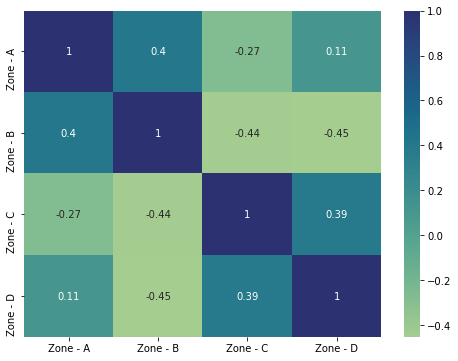

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='crest', annot=True)

All factors are marginally correlated with each other.

# 1. Mean sales per Zone

In [6]:
meanz = pd.DataFrame(data.mean(), columns = ['Mean sales per zone'])
meanz

,Mean sales per zone
Zone - A,1.540493e+06
Zone - B,1.755560e+06
Zone - C,1.772871e+06
Zone - D,1.842927e+06


The above table gives the mean sales generated by each zone.

# 2. Total sales generated by all the zones for each month.

In [7]:
df = pd.DataFrame(data.sum(axis=1), columns=['Total sales for each month'])
df

,Total sales for each month
0,7022544
1,7152303
2,6475939
3,8174449
4,5995328
5,7151387
6,7287108
7,7816299
8,6703395
9,7128210


Sum of sales generated by all zones for each month is given in the table above.

# 3. Check whether all the zones generate the same amount of sales.

To check whether all zones generate same amount of sales, we check the equality of means by applying one-way ANOVA. scipy.stats.f_oneway() is used to perform one-way ANOVA.

The hypotheses for one-way ANOVA test can be written as:
    
    Null Hypothesis H0: All zones generate the same amount of sales
    
    Alternative Hypothesis H1: Atleast one zone generates different amount of sales

In [8]:
aov = st.f_oneway(data['Zone - A'], data['Zone - B'], data['Zone - C'])
aov

F_onewayResult(statistic=7.010165231945492, pvalue=0.0015291538969922328)

The F-statistic is 7.010 and the corresponding p-value is 0.001. 

Since p-value is very small as compared to 0.05, we can reject the null hypothesis.

Hence, we can conclude that atleast one zone generated different amount of sales.